In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Replace the path with the correct path for your data.
y2015 = pd.read_csv(
    'LoanStats3d.csv',
    skipinitialspace=True,
    header=1
)

# Note the warning about dtypes.

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
y2015.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401,72868139.0,16000.0,16000.0,16000.0,60 months,14.85%,379.39,C,C5,...,0.0,2.0,78.9,0.0,0.0,2.0,298100.0,31329.0,281300.0,13400.0
1,68354783,73244544.0,9600.0,9600.0,9600.0,36 months,7.49%,298.58,A,A4,...,0.0,2.0,100.0,66.7,0.0,0.0,88635.0,55387.0,12500.0,75635.0
2,68466916,73356753.0,25000.0,25000.0,25000.0,36 months,7.49%,777.55,A,A4,...,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0
3,68466961,73356799.0,28000.0,28000.0,28000.0,36 months,6.49%,858.05,A,A2,...,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0
4,68495092,73384866.0,8650.0,8650.0,8650.0,36 months,19.89%,320.99,E,E3,...,0.0,12.0,100.0,50.0,1.0,0.0,38998.0,18926.0,2750.0,18248.0


In [4]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

#rfc = ensemble.RandomForestClassifier()
#X = y2015.drop('loan_status', 1)
#Y = y2015['loan_status']
#X = pd.get_dummies(X)

#cross_val_score(rfc, X, Y, cv=5)

In [5]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

categorical = y2015.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

id
421097
term
2
int_rate
110
grade
7
sub_grade
35
emp_title
120812
emp_length
12
home_ownership
4
verification_status
3
issue_d
12
loan_status
7
pymnt_plan
1
url
421095
desc
34
purpose
14
title
27
zip_code
914
addr_state
49
earliest_cr_line
668
revol_util
1211
initial_list_status
2
last_pymnt_d
25
next_pymnt_d
4
last_credit_pull_d
26
application_type
2
verification_status_joint
3


In [6]:
# Convert ID and Interest Rate to numeric.
y2015['id'] = pd.to_numeric(y2015['id'], errors='coerce')
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')

# Drop other columns with many unique variables
y2015.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
            'sub_grade', 'addr_state', 'desc'], 1, inplace=True)

In [7]:
y2015.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
421092,36271333.0,38982739.0,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,5 years,...,0.0,3.0,100.0,50.0,1.0,0.0,51239.0,34178.0,10600.0,33239.0
421093,36490806.0,39222577.0,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,1 year,...,1.0,2.0,95.0,66.7,0.0,0.0,96919.0,58418.0,9700.0,69919.0
421094,36271262.0,38982659.0,20000.0,20000.0,20000.0,36 months,11.99,664.20,B,10+ years,...,0.0,1.0,100.0,50.0,0.0,1.0,43740.0,33307.0,41700.0,0.0
421095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Remove two summary rows at the end that don't actually contain data.
y2015 = y2015[:-2]

In [9]:
pd.get_dummies(y2015).head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,last_credit_pull_d_Nov-2016,last_credit_pull_d_Oct-2015,last_credit_pull_d_Oct-2016,last_credit_pull_d_Sep-2015,last_credit_pull_d_Sep-2016,application_type_INDIVIDUAL,application_type_JOINT,verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified
0,68009401.0,72868139.0,16000.0,16000.0,16000.0,14.85,379.39,48000.0,33.18,0.0,...,0,0,0,0,0,1,0,0,0,0
1,68354783.0,73244544.0,9600.0,9600.0,9600.0,7.49,298.58,60000.0,22.44,0.0,...,0,0,0,0,0,1,0,0,0,0
2,68466916.0,73356753.0,25000.0,25000.0,25000.0,7.49,777.55,109000.0,26.02,0.0,...,0,0,0,0,0,1,0,0,0,0
3,68466961.0,73356799.0,28000.0,28000.0,28000.0,6.49,858.05,92000.0,21.60,0.0,...,0,0,0,0,0,1,0,0,0,0
4,68495092.0,73384866.0,8650.0,8650.0,8650.0,19.89,320.99,55000.0,25.49,0.0,...,0,0,0,0,0,1,0,0,0,0


### SECOND ATTEMPT

In [10]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
Y = y2015['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=10)

array([ 0.97995773,  0.9801477 ,  0.98100259,  0.98173874,  0.96739492,
        0.97418665,  0.94485739,  0.98036049,  0.97959959,  0.98035909])

### THIRD ATTEMPT

In [11]:
X.shape

(421095, 202)

                                                 id  member_id  loan_amnt  \
id                                         1.000000   0.997540  -0.008288   
member_id                                  0.997540   1.000000  -0.008620   
loan_amnt                                 -0.008288  -0.008620   1.000000   
funded_amnt                               -0.008288  -0.008620   1.000000   
funded_amnt_inv                           -0.008554  -0.008885   0.999994   
int_rate                                  -0.053402  -0.053447   0.140572   
installment                               -0.012919  -0.013274   0.941205   
annual_inc                                 0.015055   0.014958   0.305734   
dti                                        0.005692   0.005806   0.006103   
delinq_2yrs                                0.002300   0.002261  -0.010424   
inq_last_6mths                             0.000660   0.000715  -0.039040   
open_acc                                   0.006309   0.006111   0.188214   

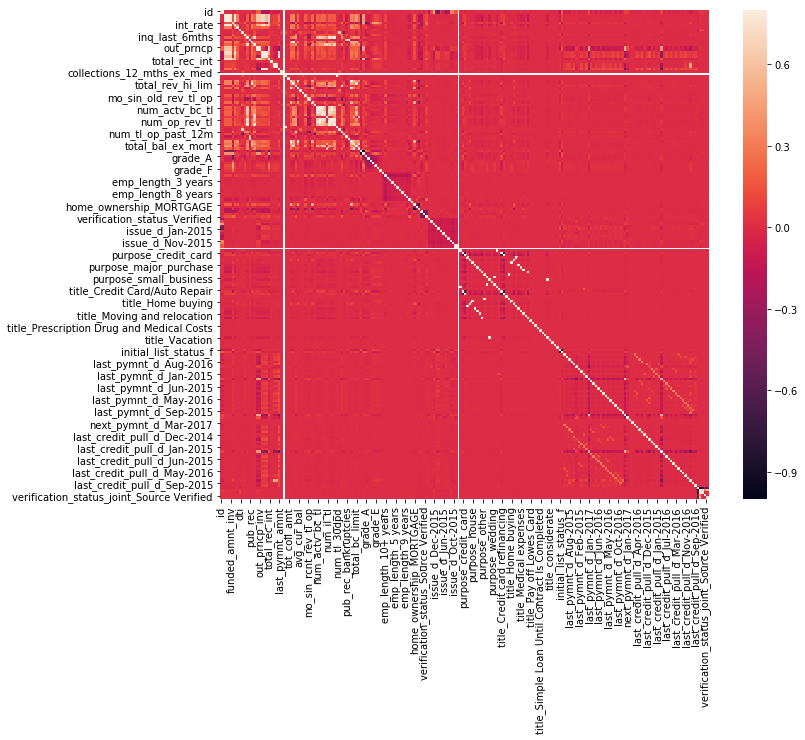

In [12]:
import seaborn as sns

# Make the correlation matrix.
corrmat = X.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [14]:
df_pca = X
X = df_pca 

# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X = StandardScaler().fit_transform(df_pca)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[  1.00000237e+00   9.97542503e-01  -8.28800909e-03 ...,   3.16988700e-02
    1.52046554e-02   2.45114833e-02]
 [  9.97542503e-01   1.00000237e+00  -8.61952110e-03 ...,   3.20023212e-02
    1.53795433e-02   2.47610695e-02]
 [ -8.28800909e-03  -8.61952110e-03   1.00000237e+00 ...,   8.35951079e-03
    7.08866573e-03   1.43504240e-02]
 ..., 
 [  3.16988700e-02   3.20023212e-02   8.35951079e-03 ...,   1.00000237e+00
   -3.12145102e-04  -5.16540667e-04]
 [  1.52046554e-02   1.53795433e-02   7.08866573e-03 ...,  -3.12145102e-04
    1.00000237e+00  -2.39751698e-04]
 [  2.45114833e-02   2.47610695e-02   1.43504240e-02 ...,  -5.16540667e-04
   -2.39751698e-04   1.00000237e+00]]


In [15]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 202).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[ -1.20351960e-02+0.j]
 [ -1.21209540e-02+0.j]
 [  2.42362974e-01+0.j]
 [  2.42362974e-01+0.j]
 [  2.42369504e-01+0.j]
 [  2.44846366e-02+0.j]
 [  2.24685958e-01+0.j]
 [  1.16913823e-01+0.j]
 [  1.92661742e-02+0.j]
 [  1.12763496e-03+0.j]
 [  2.65256876e-02+0.j]
 [  1.87079387e-01+0.j]
 [ -2.97150835e-02+0.j]
 [  1.66159656e-01+0.j]
 [  1.73894817e-01+0.j]
 [  1.43489804e-01+0.j]
 [  1.43500847e-01+0.j]
 [  1.91963205e-01+0.j]
 [  1.91960932e-01+0.j]
 [  1.58348959e-01+0.j]
 [  1.78731206e-01+0.j]
 [  8.44484427e-03+0.j]
 [  6.74664829e-03+0.j]
 [  6.95893689e-03+0.j]
 [  8.87965589e-02+0.j]
 [ -8.37190200e-03+0.j]
 [  0.00000000e+00+0.j]
 [  3.91624497e-03+0.j]
 [ -5.26187491e-03+0.j]
 [  1.71599213e-01+0.j]
 [  1.81638197e-01+0.j]
 [  8.14846018e-02+0.j]
 [  9.22442558e-02+0.j]
 [  1.93358838e-05+0.j]
 [  7.49937169e-04+0.j]
 [  9.23366615e-02+0.j]
 [ -2.87871252e-02+0.j]
 [ -3.69877093e-02+0.j]
 [  1.16858089e-01+0.j]
 [ -1.31374125e-02+0.j]
 [  1.64789956e-01+0.j]


Eigenvector 13: 
[[ -6.70107154e-02+0.j]
 [ -6.69651842e-02+0.j]
 [ -6.21588038e-02+0.j]
 [ -6.21588038e-02+0.j]
 [ -6.20233228e-02+0.j]
 [  9.09593619e-02+0.j]
 [ -1.52708979e-01+0.j]
 [ -8.26707049e-02+0.j]
 [  4.20384252e-02+0.j]
 [  7.12357771e-02+0.j]
 [ -7.39353524e-02+0.j]
 [  3.23130236e-02+0.j]
 [ -2.40727718e-01+0.j]
 [  1.46777562e-02+0.j]
 [  1.08507924e-02+0.j]
 [ -1.48999544e-02+0.j]
 [ -1.48195983e-02+0.j]
 [ -2.08715431e-02+0.j]
 [ -2.07732114e-02+0.j]
 [ -2.03174910e-02+0.j]
 [  3.11948006e-02+0.j]
 [ -3.86221808e-02+0.j]
 [ -1.71069195e-01+0.j]
 [ -1.71892950e-01+0.j]
 [  7.38567778e-02+0.j]
 [ -1.79211928e-03+0.j]
 [  0.00000000e+00+0.j]
 [  6.70805723e-02+0.j]
 [ -1.53269939e-02+0.j]
 [  7.43889251e-03+0.j]
 [  1.12389388e-03+0.j]
 [ -6.86655359e-02+0.j]
 [  3.27551070e-03+0.j]
 [  2.30004438e-02+0.j]
 [  1.07645763e-02+0.j]
 [  4.71116847e-03+0.j]
 [  6.83425432e-02+0.j]
 [  7.52716520e-02+0.j]
 [  1.67058287e-02+0.j]
 [  1.24412645e-02+0.j]
 [  3.62263247e-02+0.j]

Eigenvector 25: 
[[  4.93849298e-03+0.j]
 [  4.78712577e-03+0.j]
 [  1.12323241e-02+0.j]
 [  1.12323241e-02+0.j]
 [  1.12115822e-02+0.j]
 [ -6.40316532e-03+0.j]
 [  1.44958775e-02+0.j]
 [ -2.21834254e-02+0.j]
 [ -8.39641212e-03+0.j]
 [  5.41501222e-02+0.j]
 [  1.95834795e-02+0.j]
 [ -5.44983468e-03+0.j]
 [ -1.71006487e-01+0.j]
 [ -3.96284177e-02+0.j]
 [  3.42037565e-02+0.j]
 [  8.71859056e-03+0.j]
 [  8.70645903e-03+0.j]
 [  5.58585542e-03+0.j]
 [  5.56932279e-03+0.j]
 [  2.89178409e-03+0.j]
 [  7.52701489e-03+0.j]
 [ -8.77488456e-03+0.j]
 [  1.59751275e-02+0.j]
 [  1.60269804e-02+0.j]
 [ -4.91311912e-03+0.j]
 [ -2.89787582e-04+0.j]
 [  0.00000000e+00+0.j]
 [ -6.34028833e-01+0.j]
 [  4.34929151e-02+0.j]
 [ -6.67567886e-03+0.j]
 [ -4.66034082e-02+0.j]
 [  2.77688614e-03+0.j]
 [  4.89630763e-03+0.j]
 [  6.97904152e-02+0.j]
 [ -1.24185435e-01+0.j]
 [  3.28002094e-02+0.j]
 [  4.18823712e-03+0.j]
 [  2.53589943e-03+0.j]
 [  4.68534795e-02+0.j]
 [  1.65480724e-01+0.j]
 [  4.74206472e-05+0.j]

Eigenvector 39: 
[[ -7.86820853e-03+0.j]
 [ -7.96995622e-03+0.j]
 [ -8.00031317e-03+0.j]
 [ -8.00031317e-03+0.j]
 [ -7.95449456e-03+0.j]
 [  6.22910468e-02+0.j]
 [  3.62844949e-03+0.j]
 [  1.26656346e-02+0.j]
 [ -1.11400207e-02+0.j]
 [ -2.92692324e-02+0.j]
 [ -2.33804043e-02+0.j]
 [  1.32844832e-01+0.j]
 [  3.70740879e-02+0.j]
 [ -1.36564885e-01+0.j]
 [ -1.25701866e-01+0.j]
 [ -1.12977225e-02+0.j]
 [ -1.12800915e-02+0.j]
 [ -5.16440388e-03+0.j]
 [ -5.12600164e-03+0.j]
 [ -3.88236140e-03+0.j]
 [ -5.34298118e-03+0.j]
 [ -3.97179115e-03+0.j]
 [ -3.48840268e-03+0.j]
 [ -3.70497491e-03+0.j]
 [ -6.80701785e-03+0.j]
 [ -8.48414779e-03+0.j]
 [  0.00000000e+00+0.j]
 [  4.18457071e-03+0.j]
 [  9.82045914e-03+0.j]
 [  1.42168625e-02+0.j]
 [  2.38662789e-02+0.j]
 [ -1.58153952e-01+0.j]
 [ -1.80898528e-03+0.j]
 [  1.35565873e-02+0.j]
 [ -2.53949599e-03+0.j]
 [  7.17590251e-02+0.j]
 [  4.10437949e-01+0.j]
 [ -4.84045106e-01+0.j]
 [  1.77616080e-03+0.j]
 [  5.11352477e-02+0.j]
 [  1.35970238e-01+0.j]

----------------------------------------
Eigenvector 56: 
[[  9.40636815e-03+0.j]
 [  9.40177682e-03+0.j]
 [ -6.04506094e-02+0.j]
 [ -6.04506094e-02+0.j]
 [ -6.04413637e-02+0.j]
 [  1.27203700e-01+0.j]
 [ -1.54527977e-02+0.j]
 [  1.38684983e-01+0.j]
 [ -8.81620698e-03+0.j]
 [ -6.84756435e-03+0.j]
 [ -1.13938353e-01+0.j]
 [ -6.10784044e-02+0.j]
 [ -8.45679566e-03+0.j]
 [  5.12922315e-02+0.j]
 [  1.08275320e-01+0.j]
 [  2.29886317e-04+0.j]
 [  2.19663361e-04+0.j]
 [  3.00565290e-02+0.j]
 [  3.00466262e-02+0.j]
 [  2.50542626e-02+0.j]
 [  3.51982453e-02+0.j]
 [  5.61084379e-02+0.j]
 [ -3.44475498e-02+0.j]
 [ -3.35114782e-02+0.j]
 [  1.78650650e-02+0.j]
 [  2.02122233e-03+0.j]
 [  0.00000000e+00+0.j]
 [ -3.40620003e-03+0.j]
 [ -1.00633084e-04+0.j]
 [ -4.35186553e-02+0.j]
 [  2.55053046e-03+0.j]
 [ -3.17746841e-02+0.j]
 [ -4.56676261e-02+0.j]
 [ -8.47960610e-03+0.j]
 [  9.06785592e-04+0.j]
 [ -4.57491128e-02+0.j]
 [ -1.01897812e-02+0.j]
 [ -1.06196833e-02+0.j]
 [  1.47815323e-01+0.j]
 [ -1.

Eigenvector 72: 
[[  5.69431603e-03+0.j]
 [  5.46968327e-03+0.j]
 [ -2.39895602e-03+0.j]
 [ -2.39895602e-03+0.j]
 [ -2.41948545e-03+0.j]
 [ -9.19095631e-03+0.j]
 [ -1.28400725e-02+0.j]
 [  5.23232460e-04+0.j]
 [ -1.71244949e-02+0.j]
 [ -5.44665365e-03+0.j]
 [  1.14516878e-02+0.j]
 [ -8.21581178e-03+0.j]
 [  1.78816403e-03+0.j]
 [  7.85111047e-03+0.j]
 [  9.44659226e-03+0.j]
 [  2.29144516e-03+0.j]
 [  2.27771033e-03+0.j]
 [ -1.84816367e-03+0.j]
 [ -1.86070120e-03+0.j]
 [ -7.77962786e-04+0.j]
 [ -3.52210764e-04+0.j]
 [  9.83916916e-03+0.j]
 [ -1.72133179e-02+0.j]
 [ -1.64883552e-02+0.j]
 [  2.55975099e-03+0.j]
 [  2.07391206e-03+0.j]
 [  0.00000000e+00+0.j]
 [  2.97740326e-03+0.j]
 [  1.11947501e-02+0.j]
 [ -5.92892553e-03+0.j]
 [  2.74739594e-02+0.j]
 [  4.98532048e-03+0.j]
 [ -2.46337846e-03+0.j]
 [  3.70985533e-03+0.j]
 [  8.19480562e-03+0.j]
 [  2.39011483e-02+0.j]
 [ -2.09165965e-02+0.j]
 [ -1.83315164e-02+0.j]
 [  6.20513565e-03+0.j]
 [  1.38198272e-02+0.j]
 [ -1.50913830e-02+0.j]

Eigenvector 85: 
[[ -4.89019273e-03+0.j]
 [ -4.60546333e-03+0.j]
 [  8.31895124e-03+0.j]
 [  8.31895124e-03+0.j]
 [  8.30468008e-03+0.j]
 [ -2.36902035e-02+0.j]
 [ -1.13499450e-02+0.j]
 [  5.91461427e-01+0.j]
 [  1.34486157e-01+0.j]
 [  4.34798402e-02+0.j]
 [ -1.98744224e-01+0.j]
 [  8.70414510e-02+0.j]
 [ -1.72688328e-02+0.j]
 [  1.49725732e-01+0.j]
 [  2.03049849e-03+0.j]
 [ -2.73909426e-02+0.j]
 [ -2.73951652e-02+0.j]
 [ -6.99464095e-03+0.j]
 [ -6.99815885e-03+0.j]
 [ -4.50558473e-04+0.j]
 [ -2.62823745e-02+0.j]
 [ -1.70603727e-02+0.j]
 [  5.24966589e-03+0.j]
 [  4.27475606e-03+0.j]
 [  1.74789977e-02+0.j]
 [ -4.59399303e-03+0.j]
 [  0.00000000e+00+0.j]
 [ -5.63823691e-03+0.j]
 [ -2.70293362e-03+0.j]
 [ -1.33908487e-01+0.j]
 [  1.55288207e-01+0.j]
 [  2.47325621e-01+0.j]
 [ -1.66957398e-01+0.j]
 [ -1.35197328e-03+0.j]
 [  1.79706850e-02+0.j]
 [  8.18479710e-02+0.j]
 [  1.57124935e-01+0.j]
 [  1.34672764e-01+0.j]
 [ -5.95227932e-03+0.j]
 [ -1.34620739e-02+0.j]
 [ -2.15910049e-01+0.j]

Eigenvector 98: 
[[ -4.53467363e-04+0.j]
 [ -4.29472642e-04+0.j]
 [  1.55349787e-03+0.j]
 [  1.55349787e-03+0.j]
 [  1.56653367e-03+0.j]
 [  9.02807097e-04+0.j]
 [  3.44788156e-03+0.j]
 [  2.98670297e-03+0.j]
 [ -6.67345004e-03+0.j]
 [ -4.78002632e-03+0.j]
 [  2.52204925e-02+0.j]
 [ -4.19851874e-03+0.j]
 [  4.26083182e-04+0.j]
 [  8.75770092e-03+0.j]
 [ -1.61456395e-04+0.j]
 [  3.31386170e-03+0.j]
 [  3.31515440e-03+0.j]
 [ -3.59798467e-03+0.j]
 [ -3.58487032e-03+0.j]
 [ -2.92988569e-03+0.j]
 [ -1.59542677e-03+0.j]
 [  1.72805136e-03+0.j]
 [ -8.24339018e-03+0.j]
 [ -7.93821415e-03+0.j]
 [ -2.39825877e-03+0.j]
 [ -1.94252552e-03+0.j]
 [  0.00000000e+00+0.j]
 [  7.04283502e-04+0.j]
 [  2.23661526e-03+0.j]
 [ -1.33760226e-02+0.j]
 [  5.85584964e-03+0.j]
 [ -6.89394475e-03+0.j]
 [ -1.68882652e-02+0.j]
 [  1.74595325e-03+0.j]
 [ -1.15832349e-03+0.j]
 [  8.81354513e-03+0.j]
 [  1.34226801e-03+0.j]
 [  3.29464473e-04+0.j]
 [ -1.12310286e-02+0.j]
 [  8.04926663e-04+0.j]
 [  1.71518322e-03+0.j]

----------------------------------------
Eigenvector 115: 
[[ -5.40875552e-03+0.j]
 [ -5.56860524e-03+0.j]
 [  4.42878341e-03+0.j]
 [  4.42878341e-03+0.j]
 [  4.42880171e-03+0.j]
 [ -1.21499605e-02+0.j]
 [ -4.83808712e-04+0.j]
 [  1.70547820e-02+0.j]
 [  4.34304388e-02+0.j]
 [ -7.36589369e-02+0.j]
 [  2.07988109e-02+0.j]
 [ -1.34547809e-02+0.j]
 [ -5.34312406e-03+0.j]
 [ -2.66742711e-02+0.j]
 [  9.07006035e-03+0.j]
 [  1.30553864e-03+0.j]
 [  1.30616103e-03+0.j]
 [ -7.26219964e-03+0.j]
 [ -7.26373603e-03+0.j]
 [ -7.48684277e-03+0.j]
 [ -1.89391357e-03+0.j]
 [  1.10216977e-02+0.j]
 [  1.09279131e-03+0.j]
 [  8.85087214e-04+0.j]
 [ -1.13765446e-02+0.j]
 [  8.00730528e-02+0.j]
 [  0.00000000e+00+0.j]
 [  5.85439079e-03+0.j]
 [ -1.42469824e-01+0.j]
 [  1.64305559e-03+0.j]
 [ -1.96958525e-02+0.j]
 [  1.59700138e-02+0.j]
 [  1.03856284e-02+0.j]
 [  5.76245118e-02+0.j]
 [  1.33837931e-02+0.j]
 [  1.10383788e-02+0.j]
 [  2.30778721e-02+0.j]
 [  1.24048377e-02+0.j]
 [  9.19953110e-03+0.j]
 [  6

Eigenvector 133: 
[[  5.83831763e-04+0.j]
 [ -1.16925137e-03+0.j]
 [  1.30367587e-04+0.j]
 [  1.30367587e-04+0.j]
 [  1.38261497e-04+0.j]
 [ -2.61461879e-04+0.j]
 [ -9.19583985e-04+0.j]
 [  3.44105522e-05+0.j]
 [ -1.03556354e-05+0.j]
 [ -1.75311299e-04+0.j]
 [ -7.83400944e-05+0.j]
 [ -2.19538930e-03+0.j]
 [ -1.57612753e-04+0.j]
 [  8.56482411e-06+0.j]
 [  5.41088075e-04+0.j]
 [  2.55894534e-04+0.j]
 [  2.81414167e-04+0.j]
 [ -8.72933657e-06+0.j]
 [ -6.51630754e-06+0.j]
 [ -8.79657353e-06+0.j]
 [ -2.44599233e-05+0.j]
 [ -9.41559350e-05+0.j]
 [  9.47150713e-05+0.j]
 [ -1.49782889e-04+0.j]
 [  3.23157582e-04+0.j]
 [ -1.25661155e-04+0.j]
 [  0.00000000e+00+0.j]
 [  6.04676731e-05+0.j]
 [ -7.46602655e-05+0.j]
 [  2.29516750e-04+0.j]
 [  1.23142741e-04+0.j]
 [  9.75861014e-05+0.j]
 [ -8.39001474e-05+0.j]
 [ -2.19605419e-05+0.j]
 [ -1.98088435e-05+0.j]
 [  2.23066394e-04+0.j]
 [ -2.46533123e-04+0.j]
 [  1.55509556e-04+0.j]
 [ -1.10286139e-05+0.j]
 [ -1.59075654e-04+0.j]
 [  1.25415400e-04+0.j

Eigenvector 150: 
[[  5.33703289e-03+0.j]
 [  7.23098639e-03+0.j]
 [  9.88251100e-04+0.j]
 [  9.88251100e-04+0.j]
 [  9.81435617e-04+0.j]
 [ -6.06169552e-03+0.j]
 [ -4.89230884e-03+0.j]
 [  1.31509588e-02+0.j]
 [ -4.42470104e-02+0.j]
 [ -1.64146359e-02+0.j]
 [  1.86303458e-02+0.j]
 [  4.12476594e-04+0.j]
 [ -1.55593953e-03+0.j]
 [ -4.32895006e-03+0.j]
 [  5.11718690e-03+0.j]
 [  8.56799433e-03+0.j]
 [  8.56478470e-03+0.j]
 [ -4.17474843e-03+0.j]
 [ -4.17707702e-03+0.j]
 [ -3.42271503e-03+0.j]
 [ -2.45775098e-03+0.j]
 [ -2.46728303e-02+0.j]
 [ -6.29223214e-03+0.j]
 [ -6.39586612e-03+0.j]
 [ -2.70788437e-04+0.j]
 [  4.43740625e-02+0.j]
 [  0.00000000e+00+0.j]
 [  7.55253007e-04+0.j]
 [  4.07306442e-02+0.j]
 [ -1.38936184e-03+0.j]
 [  2.81887245e-03+0.j]
 [  4.16037322e-05+0.j]
 [ -1.96883224e-03+0.j]
 [  6.48959280e-04+0.j]
 [  5.13345977e-02+0.j]
 [ -2.30234389e-03+0.j]
 [  1.38270883e-02+0.j]
 [  1.26381692e-02+0.j]
 [  2.33928191e-03+0.j]
 [  1.23298861e-02+0.j]
 [ -4.34370403e-04+0.j

Eigenvector 167: 
[[ -1.64893215e-05+0.j]
 [  3.16329503e-05+0.j]
 [ -3.03724533e-01+0.j]
 [ -3.03724533e-01+0.j]
 [  6.07001226e-01+0.j]
 [ -1.25850729e-04+0.j]
 [  4.23414926e-04+0.j]
 [ -2.91278902e-05+0.j]
 [  1.45802069e-05+0.j]
 [  8.78949971e-06+0.j]
 [ -3.54168203e-05+0.j]
 [  2.02055189e-04+0.j]
 [ -9.44357065e-05+0.j]
 [  1.37519535e-04+0.j]
 [ -9.60384447e-05+0.j]
 [ -2.91864263e-01+0.j]
 [  2.91989562e-01+0.j]
 [ -2.06006594e-01+0.j]
 [  4.32890711e-01+0.j]
 [ -2.07427646e-01+0.j]
 [ -5.96293927e-02+0.j]
 [ -1.64135406e-04+0.j]
 [ -1.38677217e-02+0.j]
 [ -2.68622134e-05+0.j]
 [  1.45131807e-04+0.j]
 [  1.79665092e-05+0.j]
 [  0.00000000e+00+0.j]
 [  2.47348686e-06+0.j]
 [ -4.25680950e-06+0.j]
 [ -5.97651416e-05+0.j]
 [ -1.09105537e-04+0.j]
 [  4.21167444e-05+0.j]
 [  4.18201344e-05+0.j]
 [  1.10835275e-05+0.j]
 [ -1.36620570e-06+0.j]
 [ -1.31142474e-05+0.j]
 [  4.49218517e-06+0.j]
 [ -1.32419107e-05+0.j]
 [  1.80481416e-05+0.j]
 [  1.76636993e-05+0.j]
 [  2.21797145e-05+0.j

Eigenvalue 182: (0.999296041424625+0j)
----------------------------------------
Eigenvector 183: 
[[ -7.54220217e-04+0.j]
 [ -6.19189949e-04+0.j]
 [  7.67125183e-04+0.j]
 [  7.67125183e-04+0.j]
 [  7.59442801e-04+0.j]
 [ -4.31777462e-04+0.j]
 [  8.83413730e-04+0.j]
 [ -8.45715516e-03+0.j]
 [  1.77024678e-03+0.j]
 [ -3.30558917e-03+0.j]
 [ -2.38728536e-03+0.j]
 [ -1.02488182e-03+0.j]
 [ -5.96104235e-04+0.j]
 [  6.25140610e-03+0.j]
 [  2.68565591e-04+0.j]
 [  1.06114757e-03+0.j]
 [  1.05538566e-03+0.j]
 [ -8.28614485e-05+0.j]
 [ -8.76118023e-05+0.j]
 [ -6.70656632e-05+0.j]
 [ -2.49608658e-04+0.j]
 [ -5.35109817e-03+0.j]
 [  7.82641595e-04+0.j]
 [  7.86334070e-04+0.j]
 [ -8.21671611e-04+0.j]
 [  3.49847417e-02+0.j]
 [  0.00000000e+00+0.j]
 [  1.22162292e-03+0.j]
 [  1.37062742e-02+0.j]
 [ -3.42355988e-03+0.j]
 [  6.88606392e-03+0.j]
 [  4.34301132e-04+0.j]
 [ -3.93446876e-03+0.j]
 [  1.08700059e-02+0.j]
 [ -1.06070459e-02+0.j]
 [ -1.80689940e-03+0.j]
 [  2.05659467e-03+0.j]
 [  8.51448485

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


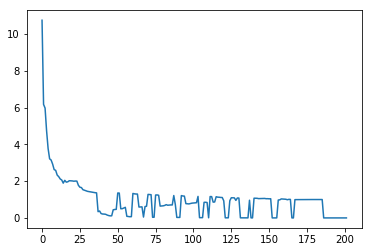

In [16]:
plt.plot(eig_val_cov)
plt.show()

In [17]:
sklearn_pca = PCA(n_components=15)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)


The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [ 0.05375103  0.03086755  0.02986055  0.0236895   0.01888214  0.01606774
  0.01573278  0.01461776  0.01312566  0.01293489  0.01157862  0.01117528
  0.01048997  0.01023496  0.01016237]


In [18]:
Y_sklearn

array([[ 3.86862107,  2.66875328, -3.08682036, ...,  0.14625017,
         0.52810042,  0.42555454],
       [-3.26735923,  0.1524394 , -2.27448837, ...,  0.44199301,
         0.74593545, -0.18146586],
       [ 2.57207585, -4.14860659,  1.67962245, ...,  0.70730181,
         0.11135661, -0.2636907 ],
       ..., 
       [-1.76928529, -0.62650329,  3.59443486, ..., -1.49483904,
        -0.01981822,  0.37215862],
       [-0.41311723,  0.73583703,  4.78341075, ..., -0.39439865,
        -0.38488311, -0.34344047],
       [ 0.06183754, -1.48406519, -0.05424578, ...,  1.94597017,
         1.47026824, -0.28116804]])

In [ ]:
Y_sklearn.shape

(421095, 15)

In [ ]:
rfc = ensemble.RandomForestClassifier()
X = Y_sklearn
Y = y2015['loan_status']
#X = pd.get_dummies(X)
#X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=10)

The number of features has been reduced from 202 to 15 while maintaining an average cross validation score well above 90%!